In [1]:
import os
from pathlib import Path

import librosa
import librosa.display
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

sb.set()

In [2]:
call_path = Path(os.environ['DATA_DIR']) / 'calls' / 'apus_apus' / '103552.wav'
call, sr = librosa.load(call_path, sr=44100)

# Trim silent edges
call, _ = librosa.effects.trim(call)

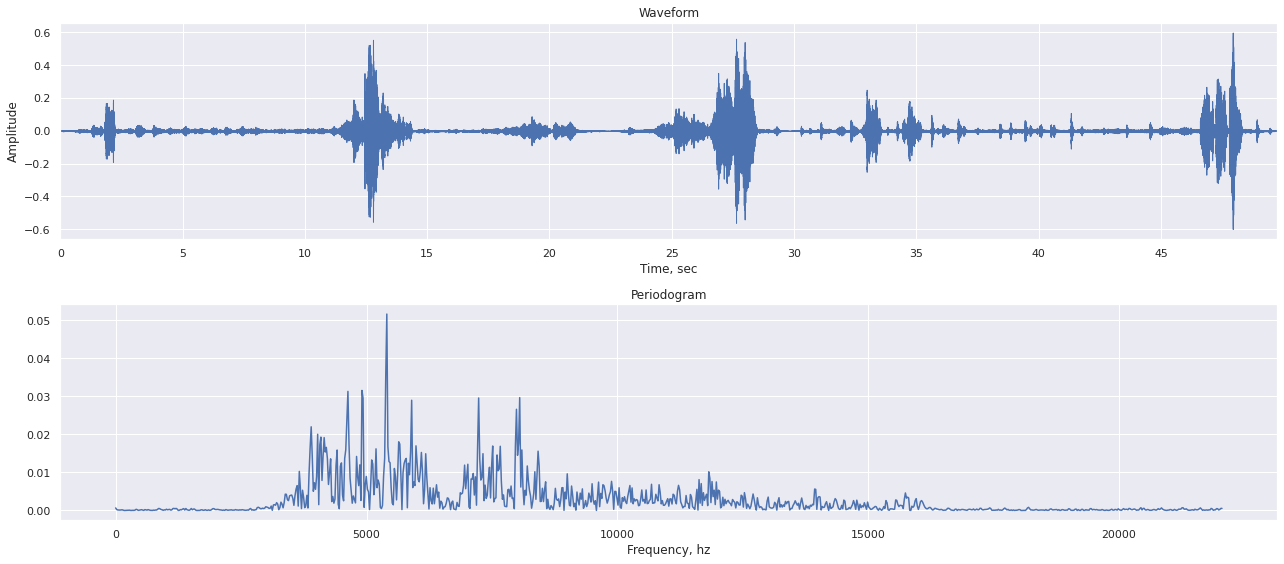

In [3]:
# Split signal into 2048 windows and compute STFT only for the first window
n_fft = 2048
S = np.abs(librosa.stft(call[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
freqs = sr / n_fft * np.arange(n_fft / 2 + 1)

plt.figure(figsize=(18, 8))

plt.subplot(2, 1, 1)
librosa.display.waveplot(call, sr=sr)
plt.xlabel('Time, sec')
plt.ylabel('Amplitude')
plt.title('Waveform')

plt.subplot(2, 1, 2)
plt.plot(freqs, S)
plt.xlabel('Frequency, hz')
plt.title('Periodogram')

plt.tight_layout()
plt.show()

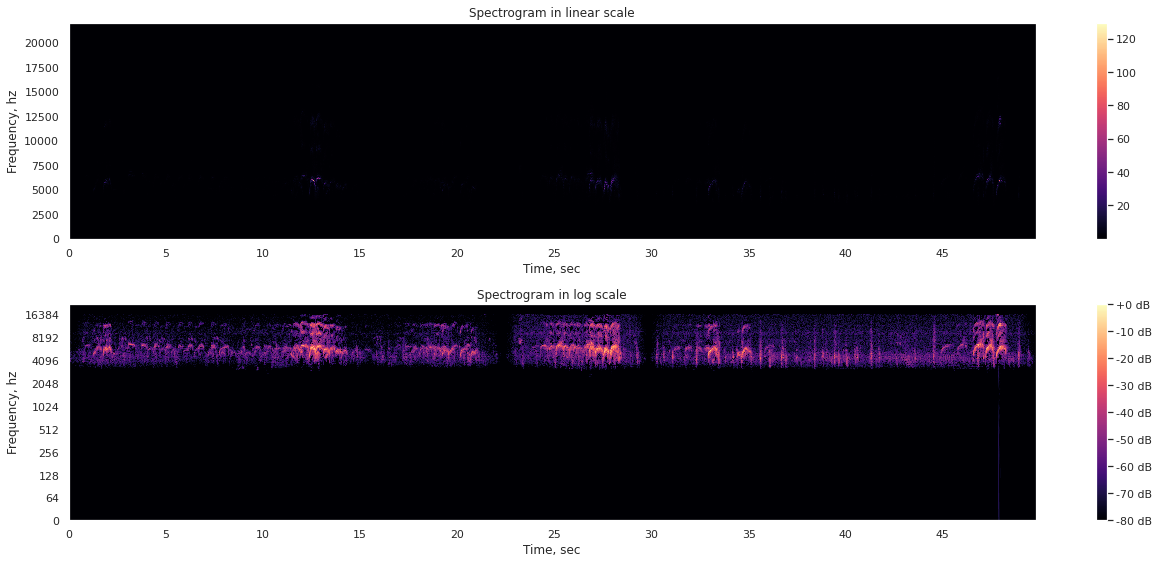

In [4]:
# Spectrogram is informative to the human eye when presented in log scale
n_fft = 2048
hop_length = 512
S = np.abs(librosa.stft(call, n_fft=n_fft, hop_length=hop_length))
S_db = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(18, 8))

plt.subplot(2, 1, 1)
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar()
plt.xlabel('Time, sec')
plt.ylabel('Frequency, hz')
plt.title('Spectrogram in linear scale')

plt.subplot(2, 1, 2)
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time, sec')
plt.ylabel('Frequency, hz')
plt.title('Spectrogram in log scale')

plt.tight_layout()
plt.show()

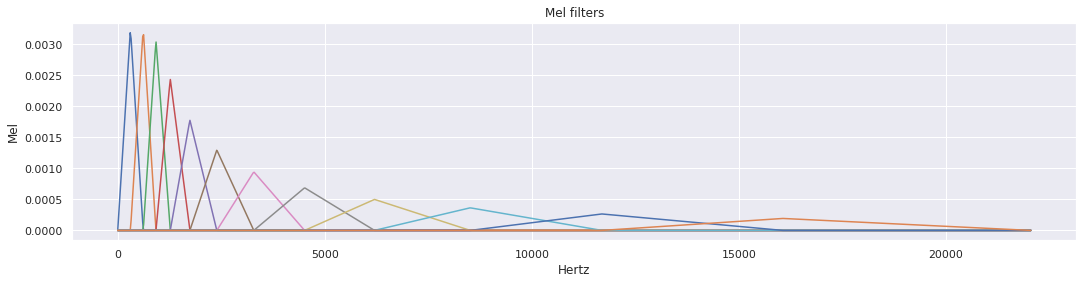

In [5]:
n_fft = 2048
n_mels = 12
# Compute Mel filters to transform spectrogram into Mel spectrogram
# Every filter transforms from Hertz scale into Mel scale
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
freqs = sr / n_fft * np.arange(n_fft / 2 + 1)

plt.figure(figsize=(18, 4))
for m in mel:
    plt.plot(freqs, m)
plt.xlabel('Hertz')
plt.ylabel('Mel')
plt.title('Mel filters')
plt.show()

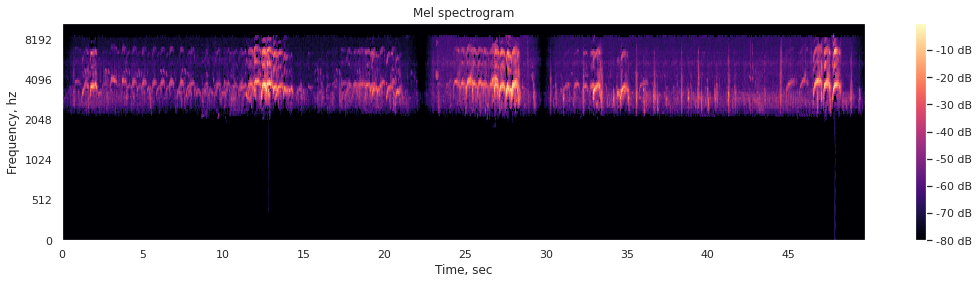

In [6]:
n_fft = 2048
hop_length = 512
n_mels = 128
MS = librosa.feature.melspectrogram(call, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
MS = librosa.power_to_db(MS, ref=np.max)

plt.figure(figsize=(18, 4))
librosa.display.specshow(MS, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time, sec')
plt.ylabel('Frequency, hz')
plt.title('Mel spectrogram')
plt.show()

In [7]:
# Assert that Mel spectrogram is computed as expected
n_fft = 2048
hop_length = 512
n_mels = 10
MS = librosa.feature.melspectrogram(call, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S = np.abs(librosa.stft(call, n_fft=n_fft, hop_length=hop_length))
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
assert (mel.dot(S ** 2) == MS).all()